## The Office

Setup and Import

In [1]:
import numpy as np
import pandas as pd

In [2]:
theoffice = pd.read_csv('https://raw.githubusercontent.com/fabriziocominetti/the-office/main/data/the-office_lines.csv')

Exploration

In [3]:
theoffice.shape

(58721, 5)

In [4]:
theoffice.head()

,Unnamed: 0,Character,Line,Season,Episode_Number
0,0,Michael,All right Jim. Your quarterlies look very goo...,1,1
1,1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1
2,2,Michael,So you’ve come to the master for guidance? Is...,1,1
3,3,Jim,"Actually, you called me in here, but yeah.",1,1
4,4,Michael,"All right. Well, let me show you how it’s don...",1,1


Check for null values in the data

In [5]:
theoffice[theoffice.isna()].sum()

Unnamed: 0        0.0
Character           0
Line                0
Season            0.0
Episode_Number    0.0
dtype: object

Number of episodes

In [39]:
ep = theoffice.groupby('Season')['Episode_Number'].nunique()
ep = theoffice.groupby('Season').nunique()

num_ep = ep['Episode_Number'].sum()

In [40]:
print(num_ep)

184


Season 1

In [6]:
theoffice1 = theoffice[theoffice['Season'] == 1]

In [7]:
theoffice1.shape

(1986, 5)

In [8]:
theoffice1['Count'] = theoffice1['Line'].str.split().str.len()

C:\Users\GRMITALY\AppData\Local\Temp/ipykernel_11508/3007427104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theoffice1['Count'] = theoffice1['Line'].str.split().str.len()


In [9]:
theoffice1.head()

,Unnamed: 0,Character,Line,Season,Episode_Number,Count
0,0,Michael,All right Jim. Your quarterlies look very goo...,1,1,14
1,1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1,9
2,2,Michael,So you’ve come to the master for guidance? Is...,1,1,14
3,3,Jim,"Actually, you called me in here, but yeah.",1,1,8
4,4,Michael,"All right. Well, let me show you how it’s don...",1,1,10


In [10]:
s1_grouped = theoffice1.groupby('Character', as_index=False)['Count'].sum()

In [11]:
s1_grouped.head()

,Character,Count
0,Angela,253
1,Darryl,111
2,Documentary Crew Member,54
3,Dwight,3697
4,Everybody,35


In [12]:
s1_grouped.shape

(32, 2)

In [13]:
s1_grouped.sort_values(by='Count', ascending=False)

,Character,Count
15,Michael,12548
3,Dwight,3697
6,Jim,3005
21,Pam,1476
18,Mr. Brown,586
19,Oscar,427
7,Katy,385
5,Jan,350
24,Ryan,330
0,Angela,253


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
s1_ordered = s1_grouped.sort_values(by='Count', ascending=False)[:5]

In [22]:
sns.set_theme(style='whitegrid')
sns.color_palette('Blues_d')

[(0.5430834294502115, 0.733917723952326, 0.8593156478277586),
 (0.41069332308086637, 0.6512213251313598, 0.8168294245802896),
 (0.2818813276944765, 0.5707599641163655, 0.7754914776368064),
 (0.21341022683583238, 0.48161476355247984, 0.6738280148660771),
 (0.20898116109188775, 0.3886043829296425, 0.5173343585800333),
 (0.20442906574394465, 0.29301038062283735, 0.3564936562860438)]

<AxesSubplot:xlabel='Count', ylabel='Character'>

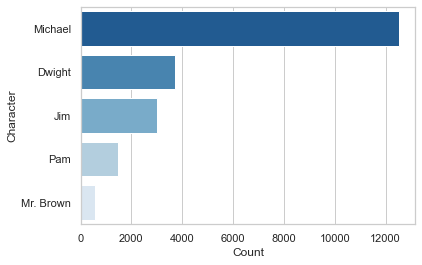

In [38]:
sns.barplot(x='Count', y='Character', data=s1_ordered, palette='Blues_r')

All seasons

In [25]:
theoffice['Count'] = theoffice['Line'].str.split().str.len()

In [26]:
all_grouped = theoffice.groupby('Character', as_index=False)['Count'].sum()

In [28]:
all_grouped.head()

,Character,Count
0,(Pam’S Mom) Heleen,2
1,3Rd Athlead Employee,7
2,4Th Athlead Employee,14
3,A.J.,35
4,Aaron Rodgers,39


In [29]:
all_grouped.sort_values(by='Count', ascending=False)

,Character,Count
450,Michael,172551
210,Dwight,88824
345,Jim,65455
25,Andy,49971
531,Pam,49490
...,...,...
256,Female Shareholder,1
720,Vance Refrigeration Guy 2,1
577,"Phyllis, Stanley, Dwight",1
505,New Scene,0


In [32]:
ordered = all_grouped.sort_values(by='Count', ascending=False)[:5]

<AxesSubplot:xlabel='Count', ylabel='Character'>

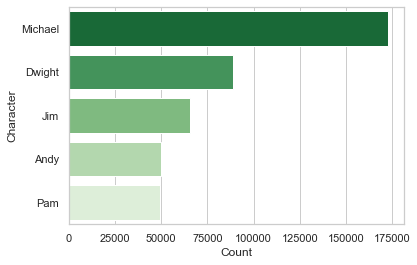

In [37]:
sns.barplot(x='Count', y='Character', data=ordered, palette='Greens_r')

Bonus: "That's what she said"

In [52]:
bonus = theoffice[theoffice['Line'].str.contains("that’s what she said", case=False, regex=False)]

In [53]:
print(len(bonus.index))

34


In [54]:
bonus.tail()

,Unnamed: 0,Character,Line,Season,Episode_Number,Count
41062,42973,David,"No, no. No, comedy is a place where the mind ...",7,13,22
41913,43846,Holly,I’m not saying it won’t be hard. But we can m...,7,15,17
43604,45603,Michael,"[putting his shoes back on, talking to the ca...",7,21,102
52935,55320,Creed,Yeah. That’s what she said.,9,5,5
58562,61148,Michael,That’s what she said.,9,23,4


In [66]:
bonus_char = bonus.groupby('Character', as_index=False)['Line'].count()

<AxesSubplot:xlabel='Line', ylabel='Character'>

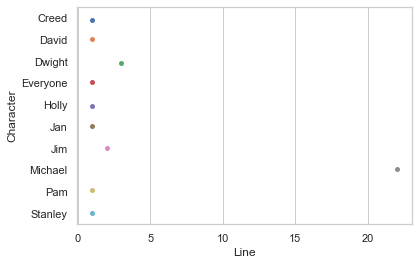

In [71]:
sns.stripplot(x='Line', y='Character', data=bonus_char)